# Multi-sites

author: laquitainesteeve@gmail.com

Plot multi-channel spatio-temporal dynamics of action potentials

Execution time: 10 secs

Tested on Ubuntu 24.04.1 LTS (32 cores, 188 GB RAM, Intel(R) Core(TM) i9-14900K ＠3.2 GHz/5.8 GHz)

Resources required:
- 180 GB RAM

## Setup

Prerequisites:

1. Setup "_envs/spikebias.yml_" virtual environment
2. Setup jupyter kernel _$python -m ipykernel install --user --name spikebias --display-name "spikebias"_
3. Download recordings: "_notebooks/0_download_recordings.ipynb_"


In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface
import spikeinterface as si
import yaml
import warnings
import spikeinterface.preprocessing as spre
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
print(spikeinterface.__version__)

# set project path
PROJ_PATH = "/home/steeve/steeve/epfl/code/spikebias"
os.chdir(PROJ_PATH)

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# figure parameters
SAVE_FIG = True
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)
    
SAMPLE_START = 15868410

PLOT_Y_PITCH = 100          # fixed distance between electrodes on plot for visibility
ylim = [-2012, 755]         # common ylim to set all voltage traces to
GAIN_TO_UV = 0.195     

DURATION = 10  # 20  # in ms, 46
n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange(SAMPLE_START, SAMPLE_START + n_timepoints, 1)    

# FIGURE SETTINGS
# colors
COLOR_V = [0.4, 0.4, 0.4]
LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

0.100.5


## L1,2/3

### Load dataset

In [2]:
fig_data = np.load(fig_data_paths["fig2k_spacetime_vivo_horv_l1_2_3"], allow_pickle=True).item()        
print(fig_data_paths["fig2k_spacetime_vivo_horv_l1_2_3"])

dataset/02_figure_dataset/fig2k_spacetime_vivo_horv_l1_2_3.npy


In [3]:
# from bottom to top on the plot
col1_site_ix = np.arange(0, len(fig_data["layers"]), 4)
col1_site_layers = fig_data["layers"][col1_site_ix]
col1_site_layers = np.flip(col1_site_layers)
col1_site_l1 = np.where(col1_site_layers == "L1")[0]
col1_site_l2_3 = np.where((col1_site_layers == "L2_3"))[0]

# find common ylim to set all voltage traces to
ymax = fig_data["trace"][:,col1_site_ix].max()
ymin = fig_data["trace"][:,col1_site_ix].min()
print(ymax, ymin)

scaled = np.array(ylim)*GAIN_TO_UV
print("gain to uV:", scaled)
print("the voltage scale of all plotted axes is:", np.round(scaled[1] - scaled[0]), "uV")

108.74097 -103.574524
gain to uV: [-392.34   147.225]
the voltage scale of all plotted axes is: 540.0 uV


### plot

* 32 sites in a column

number of sites shown: 27


([], [])

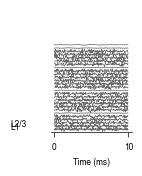

In [4]:
# scale figure vertical axis
n_sites_l123 = len(col1_site_l1) + len(col1_site_l2_3)
fig_vert_size_l123 = 1.6

FIGSIZE = (1.05, fig_vert_size_l123)

nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0 # next voltage trace translation up in the axis
row = 0
c_site = 0

# record plotted traces
save_trace_data = []

for contact_i, contact in enumerate(col1_site_ix):

    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            -120,
            0.99 * pos_up,
            "%s" % ("L2/3"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            -120,
            0.99 * pos_up,
            "%s" % ("L1"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # all other traces
    if contact_i in col1_site_l1:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH
        ax.set_ylim(ylim)

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:, col1_site_ix[contact_i]])


    if contact_i in col1_site_l2_3:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH
        ax.set_ylim(ylim)
        
        # record plotted traces
        save_trace_data.append(fig_data["trace"][:, col1_site_ix[contact_i]])


print("number of sites shown:", c_site)

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-90, Y_MAX + 600])
plt.yticks([])

number of sites shown: 24


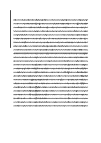

In [131]:
# setup plot
n_sites = len(col1_site_l1) + len(col1_site_l2_3)
fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# delimit layer 4 and 5
sites = np.hstack([col1_site_l1, col1_site_l2_3])
l23_ix = np.where(sites == col1_site_l2_3[0])[0]

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_V)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].spines[["left", "right", "top","bottom"]].set_visible(False)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background

    # delimit sites from layer 4 and 5
    if site==l23_ix:
        ax[site].hlines(
            y=10,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
print("number of sites shown:", n_sites)

# show voltage scale
ax[0].spines[["left"]].set_visible(True)

# label
#ax[n_sites-1].set_xlabel("Time (ms)");

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l1_2_3.svg",
        **savefig_cfg
    )

## L4 and 5

### Load dataset

In [5]:
fig_data = np.load(fig_data_paths["fig2k_spacetime_vivo_horv_l4_5"], allow_pickle=True).item()        
print(fig_data_paths["fig2k_spacetime_vivo_horv_l4_5"])

dataset/02_figure_dataset/fig2k_spacetime_vivo_horv_l4_5.npy


In [6]:
# from bottom to top on the plot    
col1_site_ix = np.arange(0, len(fig_data["layers"]), 4)
col1_site_layers = fig_data["layers"][col1_site_ix]
col1_site_layers = np.flip(col1_site_layers)
col1_site_l4 = np.where(col1_site_layers == "L4")[0]
col1_site_l5 = np.where(col1_site_layers == "L5")[0]

ymax = fig_data["trace"][:,col1_site_ix].max()
ymin = fig_data["trace"][:,col1_site_ix].min()
print(ymax, ymin)

755 -2012


number of sites shown: 27


([], [])

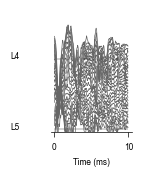

In [7]:
n_sites_l4_5 = len(col1_site_l4) + len(col1_site_l5)
keep_size_ratio = (n_sites_l4_5 * fig_vert_size_l123)/n_sites_l123

FIGSIZE = (1.05, keep_size_ratio)  # DO NOT CHANGE!! Calibrated for figure

DURATION = 10  # 20  # in ms, 46
nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)

# plot *************************

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0
layer5_ix = 0

save_trace_data = []

for contact_i, contact in enumerate(col1_site_ix):

    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            -120,
            0.99 * pos_up,
            "%s" % ("L5"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            -120,
            0.99 * pos_up,
            "%s" % ("L4"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # all other traces
    if contact_i in col1_site_l4:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH
        ax.set_ylim(ylim)
        
        # record plotted traces
        save_trace_data.append(fig_data["trace"][:, col1_site_ix[contact_i]])

    elif contact_i in col1_site_l5:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH
        ax.set_ylim(ylim)

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:, col1_site_ix[contact_i]])

print("number of sites shown:", c_site)

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-90, Y_MAX + 600])
plt.yticks([])

number of sites shown: 27


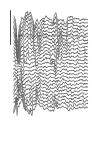

In [8]:
# setup plot
n_sites = len(col1_site_l4) + len(col1_site_l5)
fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# delimit layer 4 and 5
sites = np.hstack([col1_site_l4, col1_site_l5])
l5_ix = np.where(sites == col1_site_l5[0])[0]

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_V)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background
    ax[flipped_site].spines[["left", "right", "top","bottom"]].set_visible(False)

    # delimit sites from layer 4 and 5
    if site==l5_ix:
        ax[site].hlines(
            y=10,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
print("number of sites shown:", n_sites)

# show voltage scale (ymin and ymax voltage)
ax[0].spines[["left"]].set_visible(True)

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l4_5.svg", **savefig_cfg
    )

## L6

In [9]:
fig_data = np.load(fig_data_paths["fig2k_spacetime_vivo_horv_l6"], allow_pickle=True).item()    
print(fig_data_paths["fig2k_spacetime_vivo_horv_l6"])

dataset/02_figure_dataset/fig2k_spacetime_vivo_horv_l6.npy


In [10]:
# from bottom to top on the plot
col1_site_ix = np.arange(0, len(fig_data["layers"]), 4)
col1_site_layers = fig_data["layers"][col1_site_ix]
col1_site_layers = np.flip(col1_site_layers)
col1_site_l6 = np.where(col1_site_layers == "L6")[0]

ymax = fig_data["trace"][:,col1_site_ix].max()
ymin = fig_data["trace"][:,col1_site_ix].min()
print(ymax, ymin)

199 -173


number of sites shown: 17


([], [])

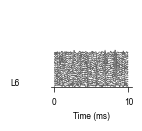

In [11]:
n_sites_l6 = len(col1_site_l6)
keep_size_ratio = (n_sites_l6 * fig_vert_size_l123)/n_sites_l123
FIGSIZE = (1.05, keep_size_ratio)  # DO NOT CHANGE!! Calibrated for figure

DURATION = 10  # 20  # in ms, 46
nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)
N_SITES = 16

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0

save_trace_data = []

for contact_i, contact in enumerate(col1_site_ix):
    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L6"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # all other traces
    if contact_i in col1_site_l6:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )        
        pos_up += PLOT_Y_PITCH
        ax.set_ylim(ylim)

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:, col1_site_ix[contact_i]])


print("number of sites shown:", c_site)

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-90, Y_MAX + 600])
plt.yticks([])

number of sites shown: 17


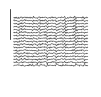

In [12]:
# make sure all voltage traces are on the same voltage scale
# setup plot
n_sites = len(col1_site_l6)
fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_V)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background
    ax[flipped_site].spines[["left", "right", "top", "bottom"]].set_visible(False)

# show voltage scale
ax[0].spines[["left"]].set_visible(True)

print("number of sites shown:", n_sites)

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l6.svg", **savefig_cfg
    )